# Modeling - Adaboost
(Using the top 10 features)

### Importing the libraries and Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import _pickle as pickle

In [2]:
with open("top10_df.pkl", "rb") as fp:
    df = pickle.load(fp)

## Preparing the Data

### Scaling the Data

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_df = df.drop(["Decision"], 1)

scaled_df = pd.DataFrame(scaler.fit_transform(features_df), 
                               index=features_df.index, 
                               columns=features_df.columns)

df = scaled_df.join(df.Decision)

### Train, test, split the DF

In [4]:
X = df.drop(["Decision"], 1)
y = df.Decision

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Functions

In [5]:
def plot_confusion_matrix(y_true, y_pred, labels=["Sell", "Buy", "Hold"], 
                          normalize=False, title=None, cmap=plt.cm.cividis):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="crimson" if cm[i, j] > thresh else "crimson",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax

In [6]:
def mod_results(clf, X_train, X_test, y_train, y_test):
    """
    Displays the results of a fitted model with a Confusion Matrix
    """
    # Getting predictions for the training set
    train_preds = clf.predict(X_train)

    # Getting predictions for the testing set
    test_preds = clf.predict(X_test)

    # Scores for both predictions
    train_score = accuracy_score(y_train, train_preds)
    test_score = accuracy_score(y_test, test_preds)

    # Printing Results
    print(f"Training Accuracy: {train_score} \t\t Testing Accuracy: {test_score}")
    
    # Displaying Confusion Matrix
    plot_confusion_matrix(y_test, test_preds, title="Confusion Matrix")
    np.set_printoptions(precision=1)
    
    # Plot non-normalized confusion matrix
    plt.show()

## Adaboost Modeling

In [7]:
# Preventing error from occuring: XGBoost causes kernel to die.
from sklearn.ensemble import AdaBoostClassifier

# Instatiating the model classifier
clf = AdaBoostClassifier()

# Fitting to the Data
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

Adaboost
Training Accuracy: 0.4788215304326719 		 Testing Accuracy: 0.4706899690515201


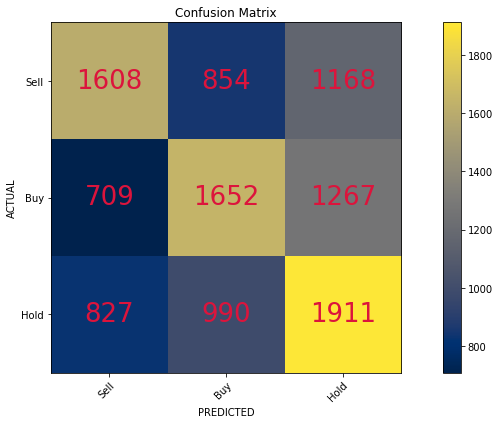

In [8]:
# Printing Results
print("Adaboost")

# Modeling and Confusion Matrix
mod_results(clf, X_train, X_test, y_train, y_test)

## Adaboost - Results
with the scaled top 10 features

In [10]:
# Adaboost
# Training Accuracy: 0.4788215304326719 		 Testing Accuracy: 0.4706899690515201

### RandomizedSearchCV

In [10]:
from sklearn.model_selection import RandomizedSearchCV

In [15]:
params = {"n_estimators": [50, 100, 200, 1000],
          "learning_rate": [.5, 1]}

In [16]:
ran_search = RandomizedSearchCV(clf, params, n_iter=1, verbose=5)

%timeit ran_search.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] n_estimators=100, learning_rate=1 ...............................
[CV]  n_estimators=100, learning_rate=1, score=0.47492491125876035, total=   4.6s
[CV] n_estimators=100, learning_rate=1 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


[CV]  n_estimators=100, learning_rate=1, score=0.4695976697615147, total=   4.5s
[CV] n_estimators=100, learning_rate=1 ...............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.7s remaining:    0.0s


[CV]  n_estimators=100, learning_rate=1, score=0.4692762858443332, total=   4.6s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.6s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] n_estimators=1000, learning_rate=0.5 ............................
[CV]  n_estimators=1000, learning_rate=0.5, score=0.4726494948575589, total=  51.0s
[CV] n_estimators=1000, learning_rate=0.5 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   54.7s remaining:    0.0s


[CV]  n_estimators=1000, learning_rate=0.5, score=0.4726014928090297, total=  50.6s
[CV] n_estimators=1000, learning_rate=0.5 ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.8min remaining:    0.0s


[CV]  n_estimators=1000, learning_rate=0.5, score=0.47209831588529816, total=  51.5s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.7min finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] n_estimators=1000, learning_rate=1 ..............................
[CV]  n_estimators=1000, learning_rate=1, score=0.47683626103576954, total=  46.7s
[CV] n_estimators=1000, learning_rate=1 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   50.3s remaining:    0.0s


[CV]  n_estimators=1000, learning_rate=1, score=0.4688694702348443, total=  45.7s
[CV] n_estimators=1000, learning_rate=1 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.7min remaining:    0.0s


[CV]  n_estimators=1000, learning_rate=1, score=0.4658170232134729, total=  43.5s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.4min finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] n_estimators=100, learning_rate=1 ...............................
[CV]  n_estimators=100, learning_rate=1, score=0.47492491125876035, total=   5.2s
[CV] n_estimators=100, learning_rate=1 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s


[CV]  n_estimators=100, learning_rate=1, score=0.4695976697615147, total=   4.8s
[CV] n_estimators=100, learning_rate=1 ...............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.8s remaining:    0.0s


[CV]  n_estimators=100, learning_rate=1, score=0.4692762858443332, total=   4.9s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   16.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   16.1s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] n_estimators=1000, learning_rate=1 ..............................
[CV]  n_estimators=1000, learning_rate=1, score=0.47683626103576954, total=  50.2s
[CV] n_estimators=1000, learning_rate=1 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   53.9s remaining:    0.0s


[CV]  n_estimators=1000, learning_rate=1, score=0.4688694702348443, total=  49.9s
[CV] n_estimators=1000, learning_rate=1 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.8min remaining:    0.0s


[CV]  n_estimators=1000, learning_rate=1, score=0.4658170232134729, total=  28.5s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.3min finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] n_estimators=50, learning_rate=0.5 ..............................
[CV]  n_estimators=50, learning_rate=0.5, score=0.47428779466642396, total=   1.5s
[CV] n_estimators=50, learning_rate=0.5 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  n_estimators=50, learning_rate=0.5, score=0.4764245403240488, total=   1.5s
[CV] n_estimators=50, learning_rate=0.5 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s


[CV]  n_estimators=50, learning_rate=0.5, score=0.47300864815657717, total=   1.5s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.8s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] n_estimators=50, learning_rate=1 ................................
[CV]  n_estimators=50, learning_rate=1, score=0.47510694457085645, total=   1.6s
[CV] n_estimators=50, learning_rate=1 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  n_estimators=50, learning_rate=1, score=0.4736027671582013, total=   1.7s
[CV] n_estimators=50, learning_rate=1 ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


[CV]  n_estimators=50, learning_rate=1, score=0.4713700500682749, total=   1.7s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.5s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] n_estimators=50, learning_rate=1 ................................
[CV]  n_estimators=50, learning_rate=1, score=0.47510694457085645, total=   1.5s
[CV] n_estimators=50, learning_rate=1 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  n_estimators=50, learning_rate=1, score=0.4736027671582013, total=   1.5s
[CV] n_estimators=50, learning_rate=1 ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


[CV]  n_estimators=50, learning_rate=1, score=0.4713700500682749, total=   1.6s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.9s finished


The slowest run took 32.91 times longer than the fastest. This could mean that an intermediate result is being cached.
1min 35s ± 1min 38s per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Using tuned parameters on Adaboost

In [17]:
# RandomizedSearchCV Results

print("Mean Training Score:", np.mean(ran_search.cv_results_['mean_train_score']))
print("Mean Testing Score:", ran_search.score(X_train, y_train))
print("\nBest Parameter Found:")
ran_search.best_params_

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


Mean Training Score: 0.4807633357410681
Mean Testing Score: 0.4788215304326719

Best Parameter Found:


{'n_estimators': 50, 'learning_rate': 1}

Adaboost with tuned Parameters
Training Accuracy: 0.4788215304326719 		 Testing Accuracy: 0.4706899690515201


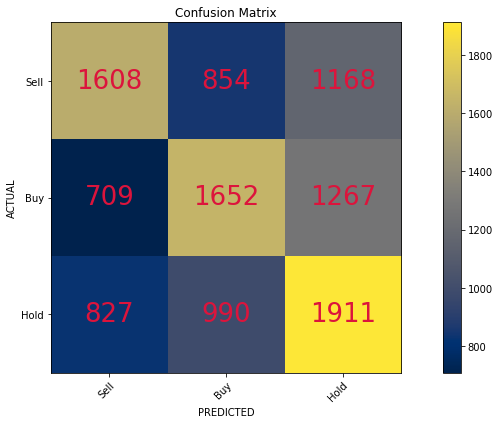

In [18]:
# Instatiating the model classifier with GridSearch's best parameters
clf = ran_search.best_estimator_

# Fitting the model
clf.fit(X_train, y_train)

# Printing Results
print("Adaboost with tuned Parameters")
mod_results(clf, X_train, X_test, y_train, y_test)